In [1]:
import pandas as pd
import json
import numpy as np

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': '533206.BSE', '3. Last Refreshed': '2023-11-10', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-11-10': {'1. open': '74.2000', '2. high': '76.4500', '3. low': '72.6000', '4. close': '75.8000', '5. volume': '2430982'}, '2023-11-09': {'1. open': '77.4400', '2. high': '77.4400', '3. low': '73.8000', '4. close': '74.6900', '5. volume': '842211'}, '2023-11-08': {'1. open': '77.3400', '2. high': '78.5300', '3. low': '76.1500', '4. close': '76.8600', '5. volume': '2618685'}, '2023-11-07': {'1. open': '74.0400', '2. high': '77.3000', '3. low': '73.5900', '4. close': '76.5000', '5. volume': '3378546'}, '2023-11-06': {'1. open': '74.3500', '2. high': '75.6000', '3. low': '73.1000', '4. close': '73.4500', '5. volume': '1784276'}, '2023-11-03': {'1. open': '75.4000', '2. high': '75.5300', '3. low': '73.5500', '4. close': '73.8600', '5. volume': '860027'}, '2

In [3]:
xdf.head()

,dates,price
0,2023-11-10,75.80
1,2023-11-09,74.69
2,2023-11-08,76.86
3,2023-11-07,76.50
4,2023-11-06,73.45


In [4]:
xdf.describe()

,dates,price
count,100,100.000000
mean,2023-08-29 16:33:36,61.133800
min,2023-06-19 00:00:00,38.500000
25%,2023-07-24 18:00:00,54.512500
50%,2023-08-29 12:00:00,61.715000
75%,2023-10-05 06:00:00,71.377500
max,2023-11-10 00:00:00,81.750000
std,NaN,11.809761


In [5]:
# xdf.to_excel("ashokley_last_20weeks.xlsx")

week_averages = {
    'week_count':[],
    'start_date':[],
    'average_price':[]
    }

week_count = 20
for i in range(0,len(xdf),5):
    try:
        avg = np.mean(xdf.loc[i:i+4]['price'])
        week_averages['average_price'].append(avg)
        week_averages['week_count'].append(week_count)
        week_averages['start_date'].append(xdf.loc[i]['dates'])
        week_count -= 1
    except Exception as err:
        print(f"Error at {i} - {err}")
            
week_averages

{'week_count': [20,
  19,
  18,
  17,
  16,
  15,
  14,
  13,
  12,
  11,
  10,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1],
 'start_date': [Timestamp('2023-11-10 00:00:00'),
  Timestamp('2023-11-03 00:00:00'),
  Timestamp('2023-10-27 00:00:00'),
  Timestamp('2023-10-19 00:00:00'),
  Timestamp('2023-10-12 00:00:00'),
  Timestamp('2023-10-05 00:00:00'),
  Timestamp('2023-09-27 00:00:00'),
  Timestamp('2023-09-20 00:00:00'),
  Timestamp('2023-09-12 00:00:00'),
  Timestamp('2023-09-05 00:00:00'),
  Timestamp('2023-08-29 00:00:00'),
  Timestamp('2023-08-22 00:00:00'),
  Timestamp('2023-08-14 00:00:00'),
  Timestamp('2023-08-07 00:00:00'),
  Timestamp('2023-07-31 00:00:00'),
  Timestamp('2023-07-24 00:00:00'),
  Timestamp('2023-07-17 00:00:00'),
  Timestamp('2023-07-10 00:00:00'),
  Timestamp('2023-07-03 00:00:00'),
  Timestamp('2023-06-23 00:00:00')],
 'average_price': [75.46000000000001,
  72.074,
  69.19200000000001,
  74.6,
  70.80199999999999,
  72.158,
  70.326,
  77.40599999999999,


In [6]:
week_averages = pd.DataFrame(week_averages)
# week_averages.to_excel('avg_ashokley_last_20weeks.xlsx')

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'ASHOKLEY.BSE', '3. Last Refreshed': '2023-11-29', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-11-29': {'1. open': '179.3500', '2. high': '182.5000', '3. low': '178.5000', '4. close': '181.2000', '5. volume': '922417'}, '2023-11-28': {'1. open': '178.4000', '2. high': '181.0000', '3. low': '178.1500', '4. close': '179.0000', '5. volume': '588424'}, '2023-11-24': {'1. open': '178.0000', '2. high': '179.8500', '3. low': '175.8000', '4. close': '178.3500', '5. volume': '580471'}, '2023-11-23': {'1. open': '179.7500', '2. high': '179.7500', '3. low': '177.4000', '4. close': '177.9500', '5. volume': '222134'}, '2023-11-22': {'1. open': '179.7000', '2. high': '181.2000', '3. low': '176.4500', '4. close': '178.3000', '5. volume': '1083036'}, '2023-11-21': {'1. open': '172.9500', '2. high': '178.6500', '3. low': '172.4000', '4. close': '178.1500', '5.

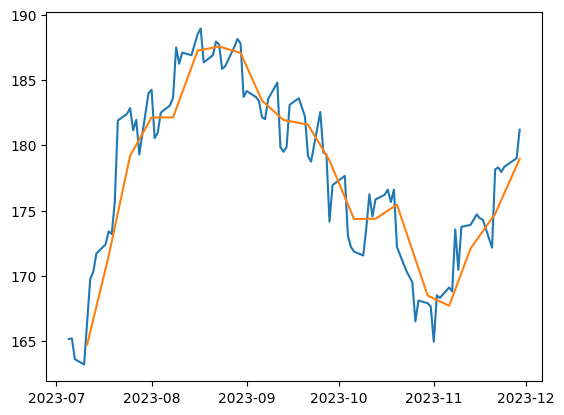

In [1]:
from matplotlib import pyplot as plt
import utils

symbol_token = "ASHOKLEY.BSE"

xdf = utils.get_last_100_days(symbol_token)

fig, axes = plt.subplots(1,1)
week_averages = utils.get_avg_last_20weeks(xdf, symbol_token)
axes.plot(xdf["dates"], xdf["price"])
axes.plot(week_averages['start_date'], week_averages['average'])
plt.show()
# xdf.plot(x="dates", y="price")

In [8]:
ydf = utils.get_last_100_days("ASHOKLEY.BSE")

In [9]:
ydf.describe()

,dates,price
count,100,100.000000
mean,2023-06-23 17:45:36,163.519500
min,2023-04-12 00:00:00,136.250000
25%,2023-05-18 18:00:00,148.375000
50%,2023-06-22 12:00:00,163.750000
75%,2023-07-28 18:00:00,182.062500
max,2023-09-04 00:00:00,188.950000
std,NaN,17.067677
